# 图像膨胀

In [1]:
import numpy as np
import cupy as cp
import cv2
import string
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [2]:
def load_kernel(src,kname):
    _ = cp.zeros((1,)) # 初始化cuda context
    kernel = cp.core.core.compile_with_cache(src).get_function(kname)
    return kernel
def load_kernel_file(fname,kname):
    sources = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read()
    kernel = load_kernel(sources,kname)
    return kernel

In [3]:
dilate = load_kernel_file('../../datas/cuda/dilate.cu','dilate')

In [4]:
src = cv2.imread('../../datas/char.jpg',0)

In [5]:
height,width = src.shape
dim_block = (32,32)
grid = ((dim_block[0] + width - 1) // dim_block[0],
        (dim_block[1] + height - 1) // dim_block[1])
src_cu = cp.array(src).astype(cp.float32)
dst_cu = cp.zeros(src.shape,dtype=cp.float32)

In [6]:
dilate(grid=grid,block=dim_block,args=(src_cu,dst_cu,3,5,width,height))

In [10]:
dst = dst_cu.get()
print(dst)
dst[dst < 0] = 0
dst[dst >255] = 255
dst = dst.astype(np.uint8)

[[255. 255. 255. ...   0.   0. 128.]
 [255. 255.   0. ...   0.   0. 128.]
 [255. 255.   0. ...   0.   0. 128.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


([], <a list of 0 Text yticklabel objects>)

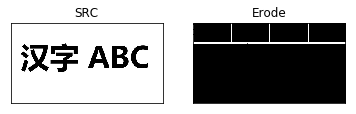

In [8]:
plt.subplot(121)
plt.imshow(src,'gray')
plt.title('SRC')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Erode')
plt.xticks([])
plt.yticks([])